In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager


executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
soup = soup(html, 'html.parser')

In [2]:
table = soup.find('table', class_='table')

In [3]:
table_header = table.find_all('th')

headers=[]
for header_ele in table_header:
    title=header_ele.text
    headers.append(title)
    
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [4]:
df=pd.DataFrame(columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [5]:
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df)
        df.loc[lenghth]=row_data
        
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
browser.quit()

In [7]:
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


In [9]:
# Answer the following question: How many months exist on Mars?
nb_of_months=df['month'].nunique()
print(f'There are', nb_of_months ,'months on Mars.')

There are 12 months on Mars.


In [10]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
first_day_of_data=df['sol'].min()
last_day_of_data = df['sol'].max()
unique_days_date=df['sol'].nunique()
print(f'There are', unique_days_date, 'Martian days worth of data in the'
      'dataset, spreading from day',first_day_of_data, 'to day',last_day_of_data,'. It is worth noting that in some'
     'days data is taken multiple times. ')

There are 1867 Martian days worth of data in thedataset, spreading from day 10 to day 1977 . It is worth noting that in somedays data is taken multiple times. 


In [11]:
# Iterating through the data to find the average minimum temperature for each month
avg_min_temp=[]

for i in range(1,nb_of_months+1):
    weather_per_month={"month_nb":"","avg_min_temp":""}
    avg_min_temp_month=df.loc[df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month_nb"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)    

print(avg_min_temp)      

[{'month_nb': 1, 'avg_min_temp': -77.0}, {'month_nb': 2, 'avg_min_temp': -80.0}, {'month_nb': 3, 'avg_min_temp': -83.0}, {'month_nb': 4, 'avg_min_temp': -83.0}, {'month_nb': 5, 'avg_min_temp': -79.0}, {'month_nb': 6, 'avg_min_temp': -75.0}, {'month_nb': 7, 'avg_min_temp': -72.0}, {'month_nb': 8, 'avg_min_temp': -68.0}, {'month_nb': 9, 'avg_min_temp': -69.0}, {'month_nb': 10, 'avg_min_temp': -72.0}, {'month_nb': 11, 'avg_min_temp': -72.0}, {'month_nb': 12, 'avg_min_temp': -74.0}]


In [12]:
# Export Python list to JSON file
import json
json_mars_temp = json.dumps(avg_min_temp)
# Save json as df file
df_month_temp=pd.read_json(json_mars_temp)
df_month_temp

,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


Text(0.5, 1.0, 'Avergae Minimum Temperature by Month')

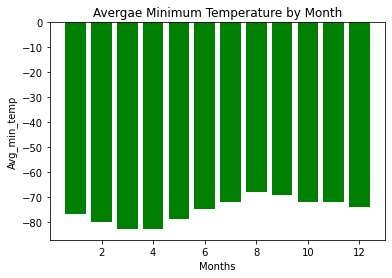

In [13]:
# Plot avg_min_temp
plt.bar(df_month_temp['month_nb'],df_month_temp['avg_min_temp'], color='green')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_min_temp")

# Create title 
plt.title('Avergae Minimum Temperature by Month')

In [14]:
# The coldest month 
min_avg_temp = df_month_temp['avg_min_temp'].min()
month_min_temp=df_month_temp.loc[df_month_temp['avg_min_temp']==min_avg_temp]
month_min_temp

,month_nb,avg_min_temp
2,3,-83
3,4,-83


In [15]:
# The warmest month
max_avg_temp = df_month_temp['avg_min_temp'].max()
month_max_temp=df_month_temp.loc[df_month_temp['avg_min_temp']==max_avg_temp]
month_max_temp

,month_nb,avg_min_temp
7,8,-68


In [16]:
# Grouping DataFrame by the average of pressure for each month
df_by_month=df.groupby('month')
df_month_pressure=df_by_month.mean().loc[:,['pressure']]
df_month_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [17]:
# The month with the lowest atmospheric pressure  
min_avg_pressure= df_month_pressure['pressure'].min()
month_min_pressure=df_month_pressure.loc[df_month_pressure['pressure']==min_avg_pressure]
month_min_pressure

,pressure
month,
6,745.054422


In [18]:
# The month with the highest atmospheric pressure  
max_avg_pressure= df_month_pressure['pressure'].max()
month_max_pressure=df_month_pressure.loc[df_month_pressure['pressure']==max_avg_pressure]
month_max_pressure

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Avergae Pressure by Month')

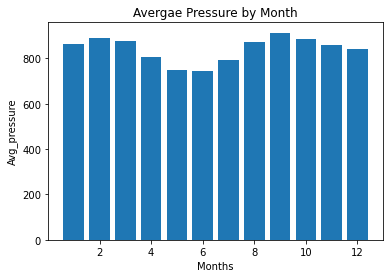

In [19]:
# Plot avg_pressure
x=range(1,13)
plt.bar(x,df_month_pressure['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title 
plt.title('Avergae Pressure by Month')

In [20]:
#Terrestrial Days 
orig_long=df['ls'].loc[0]
orig_long

155

In [21]:
same_long=df.loc[df['ls']==orig_long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [22]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

a=same_long['terrestrial_date'].loc[0]
date_after_one_martial_year = same_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-a
print(f'In one Martial year, nearly ',one_martial_year,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


Text(0.5, 1.0, 'Daily minimum temperature')

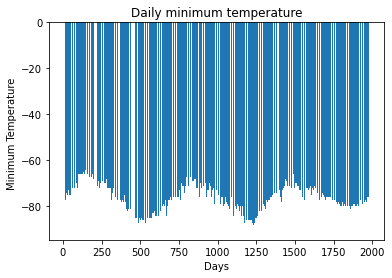

In [23]:
plt.bar(df['sol'],df['min_temp'])

plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

plt.title('Daily minimum temperature')

In [24]:
df.to_csv('mars_table.csv',index=False)